# Regression between sea level height and the dangendorf wind proxies for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [107]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

model = 'Dangendorf'

begin = 1850
end = 2014
period = f'{begin}-{end}'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [108]:
# Open data file
tg_data = imprt.import_obs_slh_data()

tg_data = tg_data.loc[begin:end]

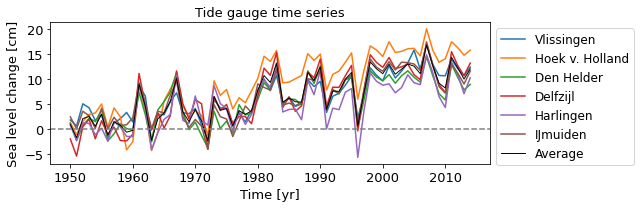

In [109]:
figs.plot_tg_data(tg_data, period = period)

#### Import and plot nearby wind data

In [110]:
pres_data_era5 = imprt.import_obs_wind_data(model = model, data_type = 'era5')

pres_data_era5 = pres_data_era5.loc[begin:end]

In [111]:
pres_data_era5

,Negative corr region,Positive corr region
time,,
1950,101014.750000,101657.226562
1951,101059.031250,101610.437500
1952,101030.546875,101655.695312
1953,101171.164062,101718.546875
1954,101028.953125,101625.062500
...,...,...
2010,101253.132812,101439.757812
2011,100941.343750,101722.960938
2012,101047.742188,101704.812500


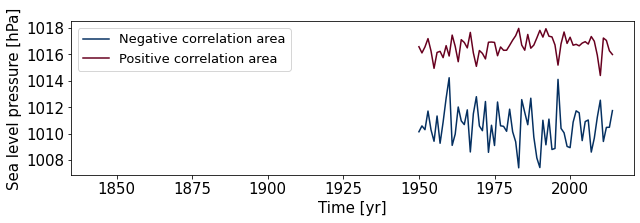

In [112]:
figs.plot_obs_pres_data(pres_data_era5, model, 'era5', title = False, period = period)

#### Plot the Dangendorf regions

In [113]:
pres_corr, tg_corr = imprt.import_pres_tg_corr_data('era5')

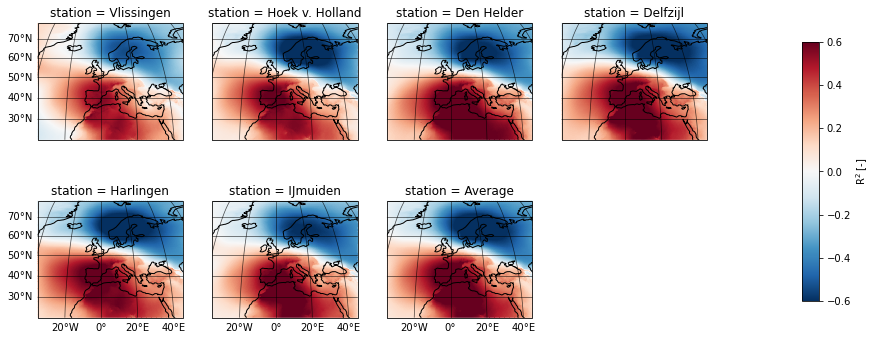

In [114]:
figs.dangendorf_all_stations_corr(pres_corr, tg_corr, 'era5', period = period)

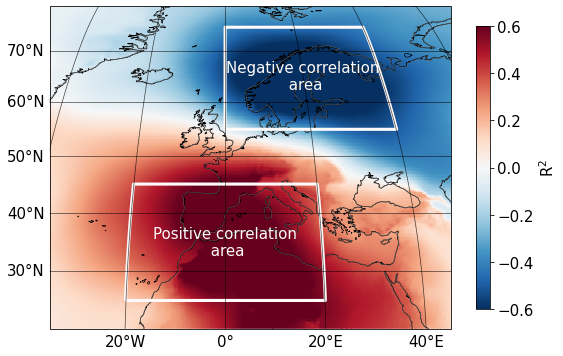

In [115]:
figs.dangendorf_regions_plot(pres_corr, tg_corr, 'era5', year_start = begin, year_final = end, period = period)

### Perform regression

In [116]:
results_era5, timeseries_era5, significance_era5, r2_df = regres.regression_obs(pres_data_era5, tg_data, wind_model = model, data_type = 'era5')

In [117]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, neg}$","R$^2_{adj, pos}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.737041,0.201201,0.14533,0.190394,0.630878,0.724108,0.161916,0.103297,0.150577,0.612725
Hoek v. Holland,0.865256,0.234026,0.194122,0.207804,0.73039,0.85863,0.196355,0.154489,0.168843,0.71713
Den Helder,0.764029,0.375346,0.255183,0.348103,0.519378,0.752423,0.344625,0.218552,0.316043,0.49574
Delfzijl,0.806043,0.339127,0.264668,0.296337,0.586741,0.796504,0.306626,0.228504,0.261731,0.566417
Harlingen,0.732311,0.423521,0.358157,0.336544,0.417836,0.719146,0.39517,0.326591,0.303915,0.389205
IJmuiden,0.744759,0.298492,0.210109,0.276003,0.563121,0.732207,0.263992,0.171261,0.240397,0.541635
Average,0.830135,0.328388,0.251402,0.291875,0.624147,0.821781,0.295358,0.214586,0.25705,0.605663


In [118]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.737041,0.201201,0.145330,0.190394,2.314269,6.533938,-0.955345,0.696637,3.346593
Hoek v. Holland,0.865256,0.234026,0.194122,0.207804,2.265406,9.038244,-1.793498,0.695871,4.952472
Den Helder,0.764029,0.375346,0.255183,0.348103,2.252336,5.583811,-1.178893,1.409089,2.935617
Delfzijl,0.806043,0.339127,0.264668,0.296337,2.516606,6.477859,-1.812159,1.185755,3.953301
Harlingen,0.732311,0.423521,0.358157,0.336544,2.432755,4.942971,-1.935929,0.994192,2.642311
IJmuiden,0.744759,0.298492,0.210109,0.276003,2.414719,6.419811,-1.170761,1.127519,3.239082
Average,0.830135,0.328388,0.251402,0.291875,2.017497,6.499439,-1.474431,1.018177,3.511563


In [119]:
timeseries_era5

Vlissingen                                                      \
     Negative corr region Positive corr region     trend     total wind total   
time                                                                            
1950             0.279150            -0.054821 -5.707969 -5.483639   0.224329   
1951            -0.016692            -0.510133 -5.529595 -6.056420  -0.526825   
1952             0.173612            -0.069722 -5.351221 -5.247331   0.103890   
1953            -0.765849             0.541898 -5.172847 -5.396799  -0.223952   
1954             0.184259            -0.367815 -4.994473 -5.178028  -0.183555   
...                   ...                  ...       ...       ...        ...   
2010            -1.313481            -2.171046  4.994473  1.509945  -3.484528   
2011             0.769576             0.584852  5.172847  6.527274   1.354428   
2012             0.058730             0.408246  5.351221  5.818197   0.466976   
2013             0.052049            -0.356487  5.529595  5.225157  -0.304438   
2014            -0.788607            -0.628048  5.707969  4.291315  -1.416654   

          Hoek v. Holland                                                      \
     Negative corr region Positive corr region     trend     total wind total   
time                                                                            
1950             0.524057            -0.054761 -8.446964 -7.977668   0.469296   
1951            -0.031336            -0.509573 -8.182997 -8.723906  -0.540909   
1952             0.325926            -0.069645 -7.919029 -7.662748   0.256281   
1953            -1.437752             0.541302 -7.655061 -8.551511  -0.896450   
1954             0.345916            -0.367411 -7.391094 -7.412589  -0.021495   
...                   ...                  ...       ...       ...        ...   
2010            -2.465837            -2.168661  7.391094  2.756595  -4.634499   
2011             1.444748             0.584209  7.655061  9.684019   2.028957   
2012             0.110256             0.407798  7.919029  8.437082   0.518053   
2013             0.097713            -0.356096  8.182997  7.924614  -0.258382   
2014            -1.480474            -0.627358  8.446964  6.339132  -2.107832   

      ...             IJmuiden                                           \
      ... Negative corr region Positive corr region     trend     total   
time  ...                                                                 
1950  ...             0.342094            -0.088729 -5.524597 -5.271231   
1951  ...            -0.020456            -0.825659 -5.351953 -6.198068   
1952  ...             0.212758            -0.112846 -5.179309 -5.079397   
1953  ...            -0.938537             0.877071 -5.006666 -5.068132   
1954  ...             0.225807            -0.595315 -4.834022 -5.203530   
...   ...                  ...                  ...       ...       ...   
2010  ...            -1.609651            -3.513876  4.834022 -0.289505   
2011  ...             0.943104             0.946592  5.006666  6.896362   
2012  ...             0.071973             0.660753  5.179309  5.912035   
2013  ...             0.063785            -0.576981  5.351953  4.838758   
2014  ...            -0.966425            -1.016506  5.524597  3.541665   

                             Average                                           \
     wind total Negative corr region Positive corr region     trend     total   
time                                                                            
1950   0.253366             0.430826            -0.080124 -5.989341 -5.638639   
1951  -0.846115            -0.025762            -0.745591 -5.802174 -6.573527   
1952   0.099913             0.267943            -0.101903 -5.615008 -5.448967   
1953  -0.061466            -1.181973             0.792016 -5.427841 -5.817797   
1954  -0.369508             0.284377            -0.537584 -5.240674 -5.493881   
...         ...                  ...          

In [120]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

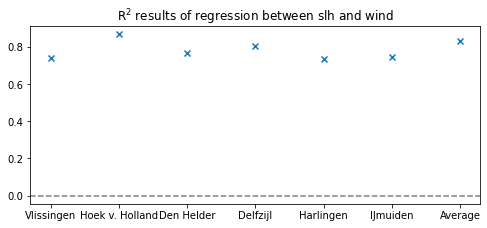

In [121]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, 'era5', period = period)

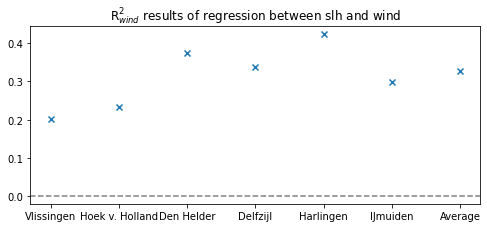

In [122]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{wind}$', model, 'era5', period = period)

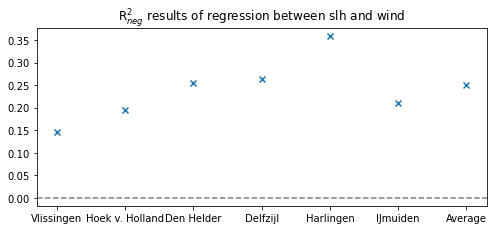

In [123]:
figs.plot_obs_result_per_station(results_era5,'R$^2_{neg}$', model, 'era5', period = period)

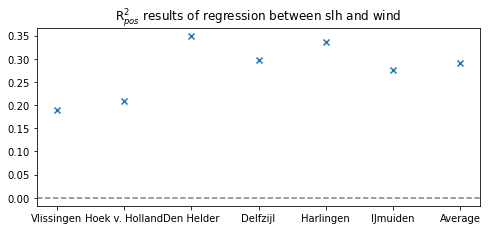

In [124]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{pos}$', model, 'era5', period = period)

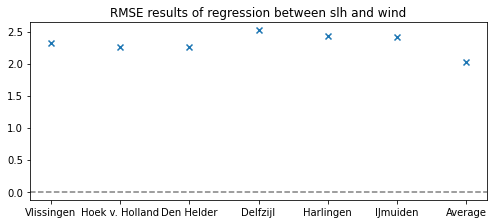

In [125]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, 'era5', period = period)

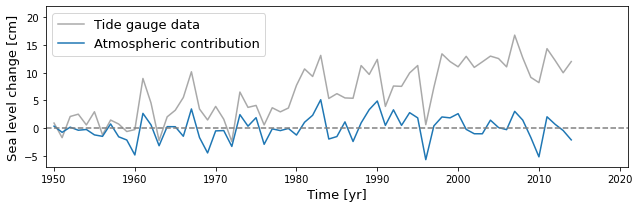

In [126]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_era5, 'Average', model, 'era5', title = False, period = period)

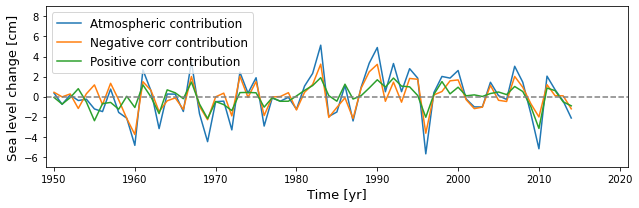

In [127]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_era5, 'Average', model, 'era5', title = False, period = period)

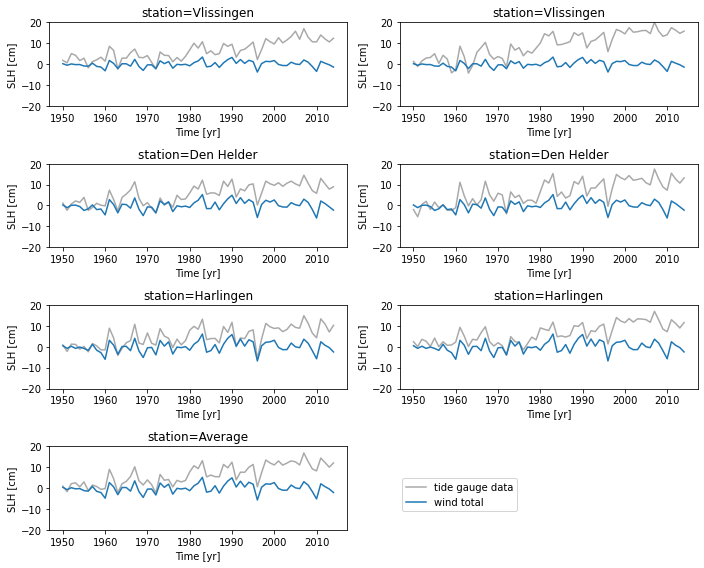

In [128]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total'], model, 'era5', period = period)

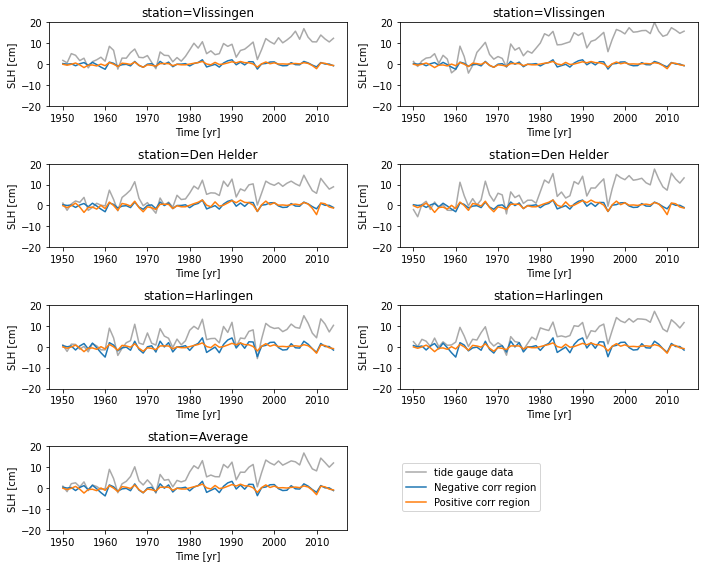

In [129]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region'], model, 'era5', period = period)

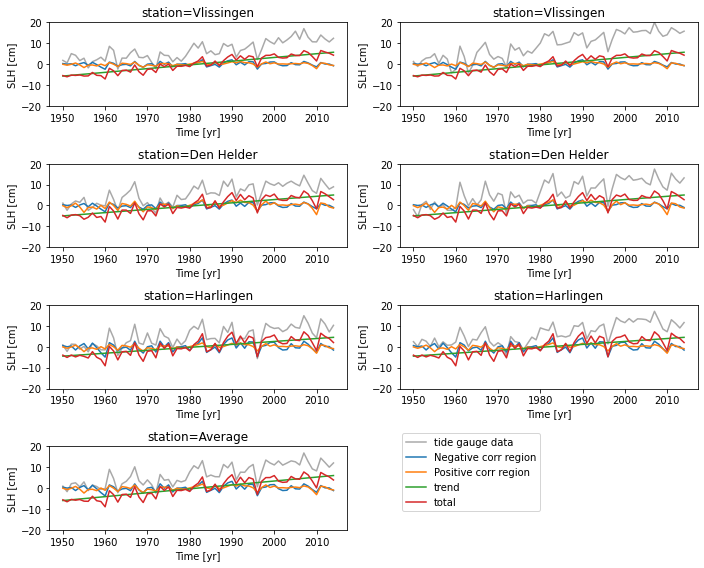

In [130]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region', 'trend', 'total'], 
                                     model, 'era5', period = period)

#### Plot trends

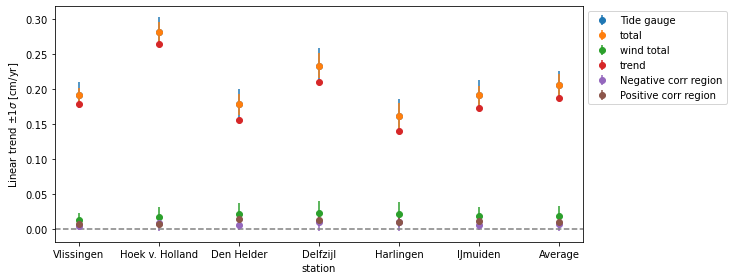

In [131]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, 'era5', period = period)

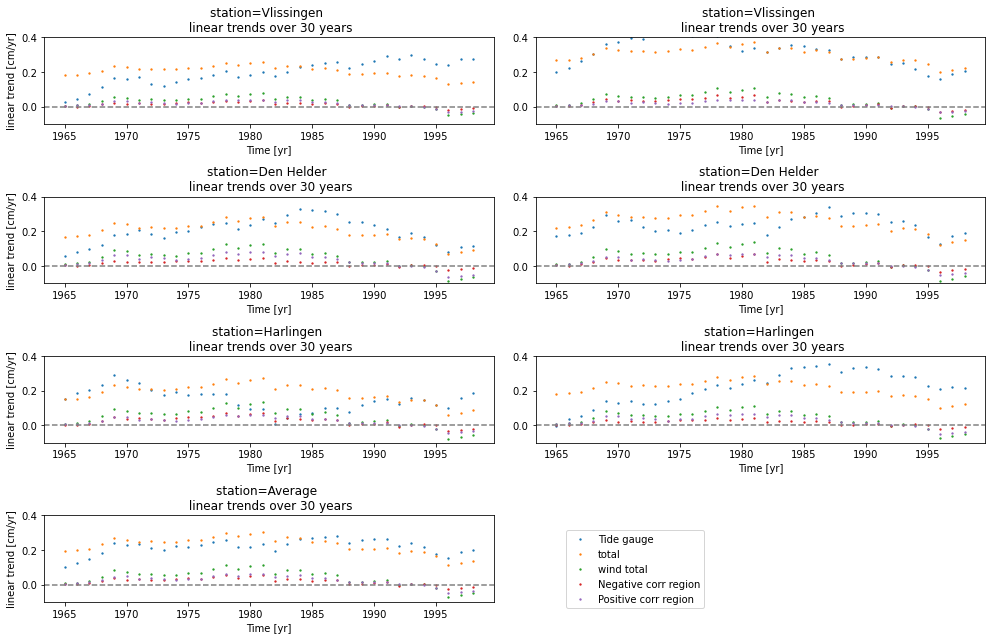

In [132]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'Negative corr region', 
                                                                               'Positive corr region'], 30, model, 'era5', 
                                                    errorbar = False, period = period)

## 20cr observational data

#### Import and plot tide gauge data

In [133]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = '20cr')

tg_data = tg_data.loc[begin:end]

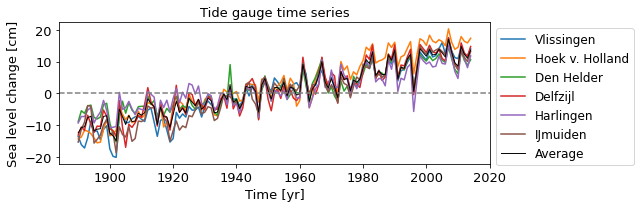

In [134]:
figs.plot_tg_data(tg_data, period = period)

#### Import and plot nearby wind data

In [135]:
pres_data_20cr = imprt.import_obs_wind_data(model = model, data_type = '20cr')

pres_data_20cr = pres_data_20cr.loc[begin:end]

In [136]:
pres_data_20cr

,Negative corr region,Positive corr region
time,,
1850,101207.539062,101507.976562
1851,101424.156250,101444.460938
1852,101240.343750,101409.343750
1853,101437.453125,101365.445312
1854,101109.109375,101599.468750
...,...,...
2010,101286.914062,101391.515625
2011,101000.593750,101683.976562
2012,101078.296875,101656.304688


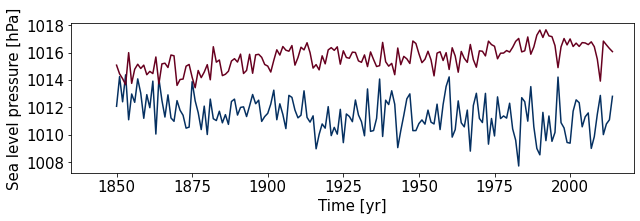

In [137]:
figs.plot_obs_pres_data(pres_data_20cr, model, '20cr', title = False, period = period)

#### Plot the Dangendorf regions

In [138]:
pres_corr, tg_corr = imprt.import_pres_tg_corr_data('20cr')

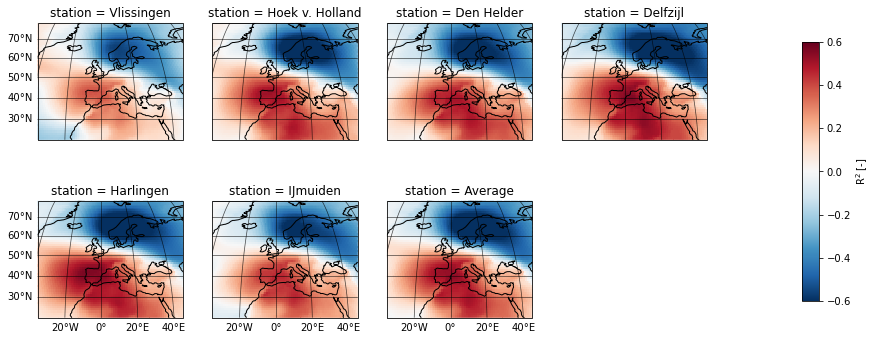

In [139]:
figs.dangendorf_all_stations_corr(pres_corr, tg_corr, '20cr', period = period)

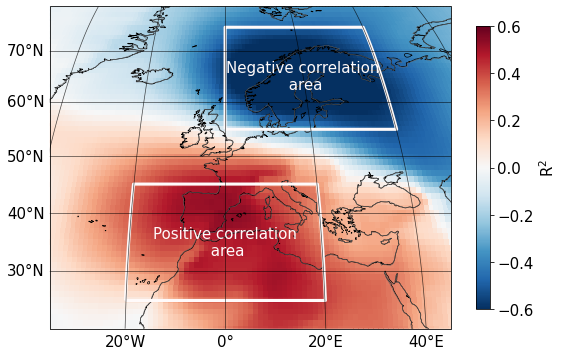

In [140]:
figs.dangendorf_regions_plot(pres_corr, tg_corr, '20cr', period = period, year_start = begin, year_final = end)

### Perform regression

In [141]:
results_20cr, timeseries_20cr, significance_20cr, r2_df = regres.regression_obs(pres_data_20cr, tg_data, wind_model = model, data_type = '20cr')

In [142]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, neg}$","R$^2_{adj, pos}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.901695,0.182896,0.075112,0.25745,0.887528,0.899257,0.162637,0.052181,0.23904,0.884739
Hoek v. Holland,0.930675,0.232575,0.108338,0.303774,0.898961,0.928956,0.213548,0.08623,0.286512,0.896456
Den Helder,0.842463,0.314081,0.163387,0.353122,0.764507,0.838557,0.297075,0.142645,0.337084,0.758668
Delfzijl,0.873892,0.295833,0.169465,0.345826,0.798358,0.870765,0.278375,0.148873,0.329607,0.793358
Harlingen,0.835735,0.412765,0.245964,0.419708,0.685475,0.831662,0.398205,0.227269,0.405321,0.677677
IJmuiden,0.876555,0.113974,0.107801,0.239538,0.84835,0.873494,0.092006,0.08568,0.220683,0.84459
Average,0.919583,0.258498,0.140227,0.326576,0.868237,0.91759,0.240114,0.11891,0.30988,0.86497


In [143]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.901695,0.182896,0.075112,0.257450,2.730965,-4.480283,-0.738733,0.636377,10.345328
Hoek v. Holland,0.930675,0.232575,0.108338,0.303774,2.486652,-2.783847,-1.216449,1.005540,11.040160
Den Helder,0.842463,0.314081,0.163387,0.353122,2.595175,-2.107837,-1.266899,1.170204,6.673113
Delfzijl,0.873892,0.295833,0.169465,0.345826,2.898808,-3.225674,-1.716759,1.196277,8.637944
Harlingen,0.835735,0.412765,0.245964,0.419708,2.457921,-1.714090,-1.675733,1.442034,5.525201
IJmuiden,0.876555,0.113974,0.107801,0.239538,3.055818,-4.482647,-1.488091,0.051500,10.206540
Average,0.919583,0.258498,0.140227,0.326576,2.191357,-3.132396,-1.350444,0.916989,8.738048


In [144]:
timeseries_20cr

Vlissingen                                             \
     Negative corr region Positive corr region      trend      total   
time                                                                   
1850            -0.349893            -0.395170 -17.810363 -18.555426   
1851            -1.588152            -0.849181 -17.593163 -20.030496   
1852            -0.537416            -1.100200 -17.375963 -19.013579   
1853            -1.664162            -1.413987 -17.158764 -20.236912   
1854             0.212765             0.258818 -16.941564 -16.469981   
...                   ...                  ...        ...        ...   
2010            -0.803628            -1.227635  16.941564  14.910301   
2011             0.833078             0.862882  17.158764  18.854724   
2012             0.388900             0.665083  17.375963  18.429946   
2013             0.213971             0.477782  17.593163  18.284916   
2014            -0.766025             0.312540  17.810363  17.356877   

                     Hoek v. Holland                                  \
     wind total Negative corr region Positive corr region      trend   
time                                                                   
1850  -0.745063            -0.576158            -0.624409 -19.006576   
1851  -2.437333            -2.615162            -1.341793 -18.774788   
1852  -1.637616            -0.884947            -1.738427 -18.543001   
1853  -3.078148            -2.740324            -2.234243 -18.311213   
1854   0.471583             0.350354             0.408959 -18.079426   
...         ...                  ...                  ...        ...   
2010  -2.031264            -1.323310            -1.939789  18.079426   
2011   1.695960             1.371804             1.363442  18.311213   
2012   1.053983             0.640390             1.050899  18.543001   
2013   0.691753             0.352339             0.754945  18.774788   
2014  -0.453485            -1.261391             0.493845  19.006576   

                            ...             IJmuiden                       \
          total wind total  ... Negative corr region Positive corr region   
time                        ...                                             
1850 -20.207143  -1.200567  ...            -0.704819            -0.031980   
1851 -22.731743  -3.956954  ...            -3.199147            -0.068722   
1852 -21.166375  -2.623374  ...            -1.082562            -0.089036   
1853 -23.285781  -4.974567  ...            -3.352259            -0.114430   
1854 -17.320113   0.759313  ...             0.428590             0.020945   
...         ...        ...  ...                  ...                  ...   
2010  14.816327  -3.263099  ...            -1.618815            -0.099349   
2011  21.046459   2.735246  ...             1.678138             0.069831   
2012  20.234289   1.691289  ...             0.783393             0.053823   
2013  19.882072   1.107284  ...             0.431019             0.038666   
2014  18.239030  -0.767545  ...            -1.543068             0.025293   

                                                   Average  \
          trend      total wind total Negative corr region   
time                                                         
1850 -17.571427 -18.308226  -0.736799            -0.639624   
1851 -17.357142 -20.625010  -3.267868            -2.903228   
1852 -17.142856 -18.314454  -1.171598            -0.982426   
1853 -16.928570 -20.395259  -3.466689            -3.042178   
1854 -16.714285 -16.264749   0.449536             0.388946   
...         ...        ...        ...                  ...   
2010  16.714285  14.996121  -1.718164            -1.469076   
2011  16.928570  18.676539   1.747969             1.522912   
2012  17.142856  17.980073   0.837217             0.710930   
2013  17.357142  17.826826   0.469685             0.391150   
2014  17.571427  16.053652  -1.517775            -1.400336   

                                                 

In [145]:
significance_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

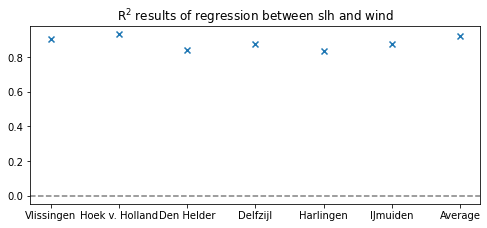

In [146]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, '20cr', period = period)

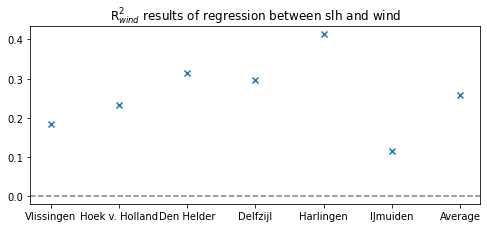

In [147]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{wind}$', model, '20cr', period = period)

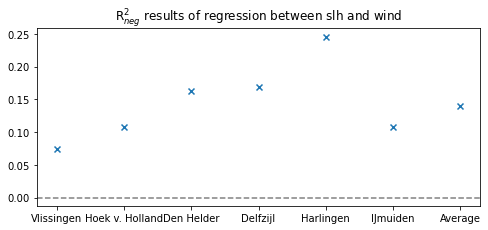

In [148]:
figs.plot_obs_result_per_station(results_20cr,'R$^2_{neg}$', model, '20cr', period = period)

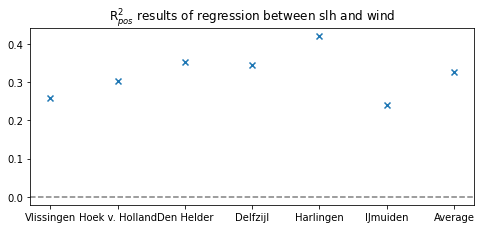

In [149]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{pos}$', model, '20cr', period = period)

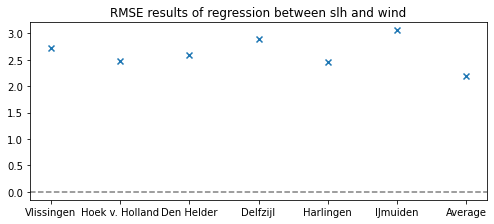

In [150]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, '20cr', period = period)

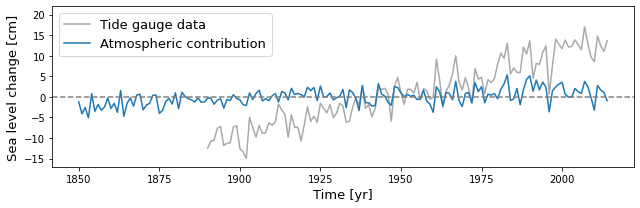

In [151]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False, period = period)

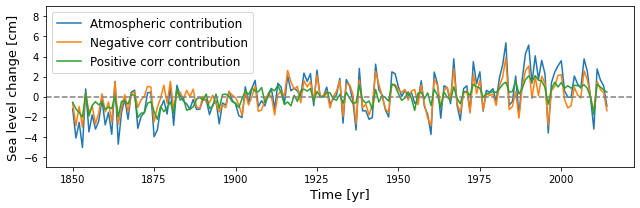

In [152]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False, period = period)

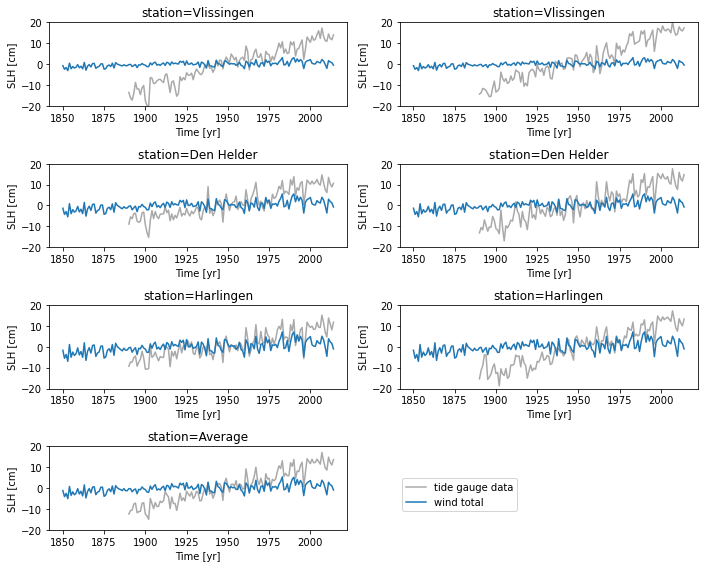

In [153]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], model, '20cr', period = period)

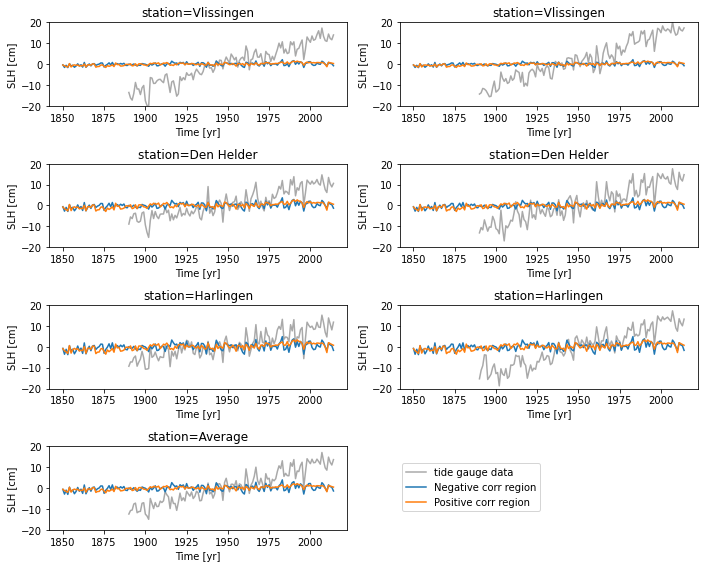

In [154]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region'], model, '20cr', period = period)

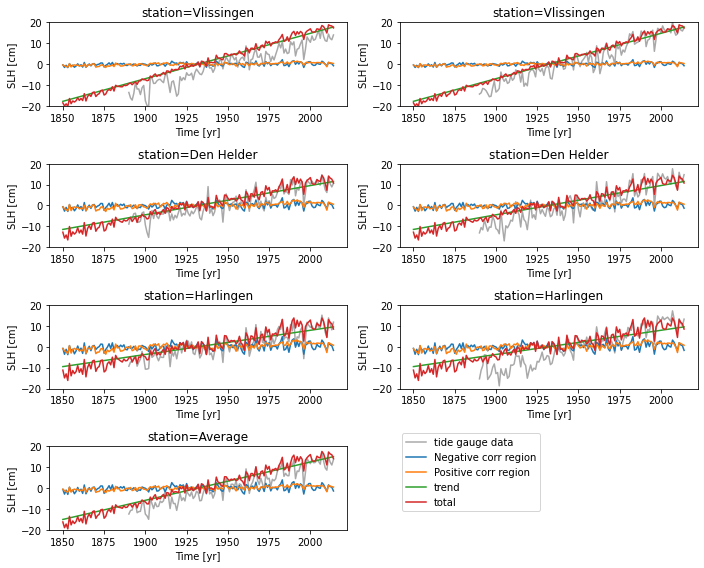

In [155]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region', 'trend', 'total'], 
                                     model, '20cr', period = period)

#### Plot trends

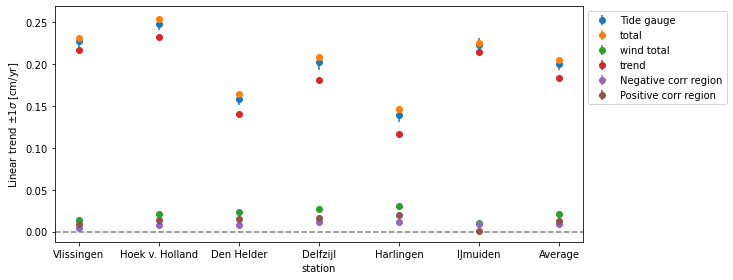

In [156]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, '20cr', period = period)

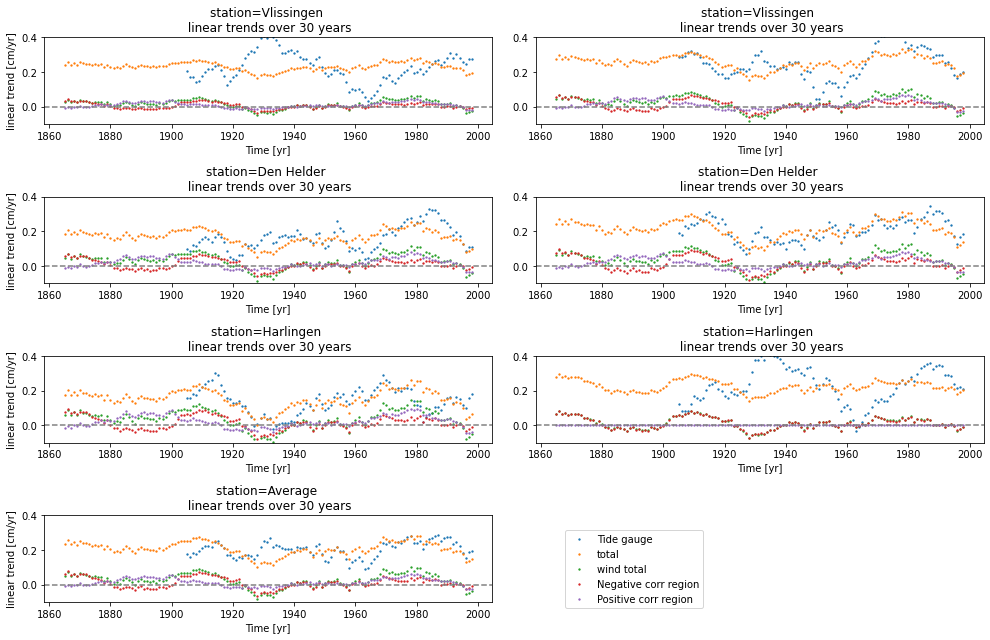

In [157]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, 
                                                    ['total', 'wind total', 'Negative corr region', 'Positive corr region'], 
                                                    30, model, '20cr', errorbar = False, period = period)

#### Calculate trends

In [160]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df = pd.DataFrame({'period':[f'{begin}-{end}'], 'trend': [np.nan], 'se': [np.nan]})
df = df.set_index('period')

df = pd.concat([df, df, df], keys = ['ERA5', '20CRv3', 'tg_data'], axis=1)

# ERA5 trends
df['ERA5', 'trend'][f'{begin}-{end}'] = linregress(timeseries_era5.loc[begin:end].index, timeseries_era5['Average', 'wind total'].loc[1950:2014].values).slope*10

# ERA5 standard errors
df['ERA5', 'se'][f'{begin}-{end}'] = linregress(timeseries_era5.loc[1950:2014].index, timeseries_era5['Average', 'wind total'].loc[1950:2014].values).stderr*10

# 20CRv3 trends
df['20CRv3', 'trend'][f'{begin}-{end}'] = linregress(timeseries_20cr.loc[1950:2014].index, timeseries_20cr['Average', 'wind total'].loc[1950:2014].values).slope*10

# 20CRv3 standard errors
df['20CRv3', 'se'][f'{begin}-{end}'] = linregress(timeseries_20cr.loc[1950:2014].index, timeseries_20cr['Average', 'wind total'].loc[1950:2014].values).stderr*10


# Tide gauge trends
df['tg_data', 'trend'][f'{begin}-{end}'] = linregress(tg_data.loc[1950:2014].index, tg_data['Average'].loc[1950:2014].values).slope*10

# Tide gauge standard errors
df['tg_data', 'se'][f'{begin}-{end}'] = linregress(tg_data.loc[1950:2014].index, tg_data['Average'].loc[1950:2014].values).stderr*10


df


ERA5             20CRv3             tg_data          
              trend       se     trend        se     trend        se
period                                                              
1850-2014  0.189595  0.14919  0.257861  0.131268  2.169399  0.200802

In [159]:
tg_data

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
time,,,,,,,
1890,-13.568070,-14.338618,-8.918373,-13.130697,-9.327698,-15.353157,-12.439436
1891,-16.172635,-13.749641,-5.471740,-10.591202,-7.283230,-11.314296,-10.763791
1892,-17.224313,-11.619300,-6.314474,-11.679703,-7.327917,-9.078860,-10.540761
1893,-14.005682,-11.928052,-3.963830,-6.906845,-5.278794,-3.857964,-7.656861
1894,-8.760928,-12.686193,-3.713707,-9.698990,-4.429588,-3.998047,-7.214575
...,...,...,...,...,...,...,...
2010,10.927738,14.503759,6.197048,7.639143,4.685082,7.445219,8.566332
2011,14.428478,17.892748,13.414106,15.889498,13.804277,13.449798,14.813151
2012,12.334111,16.393210,10.366510,12.741816,10.958842,11.360521,12.359168
